In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drivers_df = pd.read_csv('datasets/drivers.csv') # Dataframe containing driver details
drivers_df.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


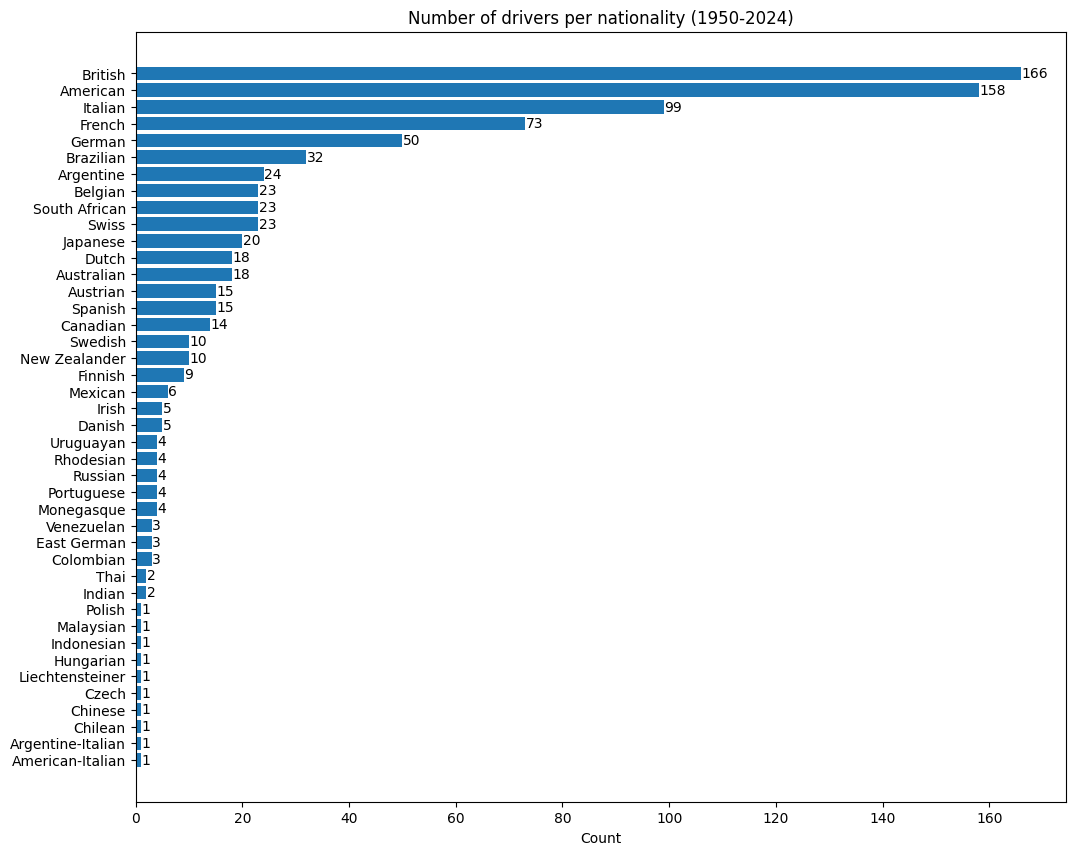

In [9]:
drivers_by_nationality_df = drivers_df.groupby('nationality').size().reset_index(name='counts')
drivers_by_nationality_df = drivers_by_nationality_df.sort_values(by='counts', ascending=True)

nationality = drivers_by_nationality_df['nationality']
counts = drivers_by_nationality_df['counts']

plt.figure(figsize=(12, 10))
bars = plt.barh(nationality, counts)

for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # Position text slightly beyond the bar's end
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        str(int(bar.get_width())),  # Display the value
        va='center',  # Align vertically
        fontsize=10  # Font size
    )

plt.title('Number of drivers per nationality (1950-2024)')
plt.xlabel('Count')
plt.show()

In [18]:
driver_standings_df = pd.read_csv('datasets/driver_standings.csv')
driver_standings_df.head(10)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
5,6,18,6,3.0,6,6,0
6,7,18,7,2.0,7,7,0
7,8,18,8,1.0,8,8,0
8,9,19,1,14.0,1,1,1
9,10,19,2,11.0,3,3,0


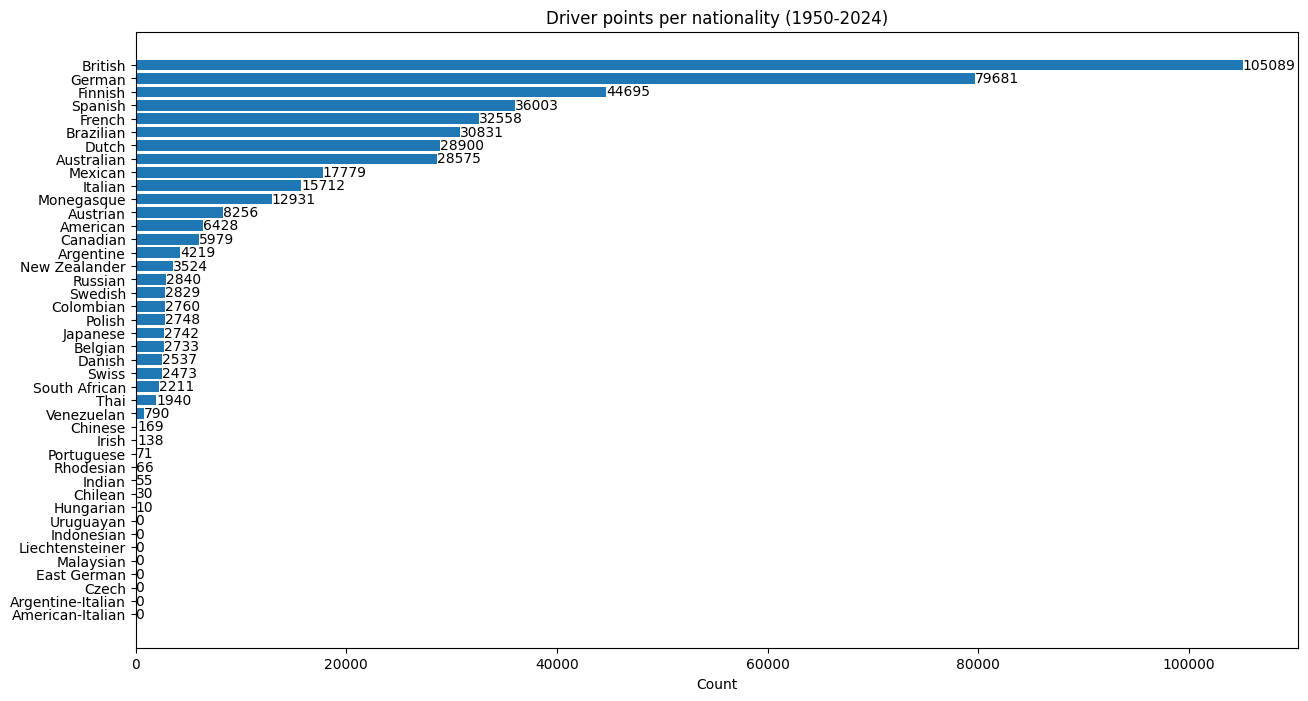

In [19]:
driver_standings_df.drop(columns=['driverStandingsId', 'raceId', 'position', 'positionText', 'wins'], inplace=True)
driver_points_df = driver_standings_df.groupby('driverId')['points'].sum().reset_index()

nationality_driver_df = drivers_df.copy().drop(columns=['driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'url'])

merged_df = pd.merge(driver_points_df, nationality_driver_df, on='driverId')

nationality_driver_points_df = merged_df.groupby('nationality')['points'].sum().reset_index().sort_values(by='points', ascending=True)

nationality = nationality_driver_points_df['nationality']
points = nationality_driver_points_df['points']

plt.figure(figsize=(15, 8))
bars = plt.barh(nationality, points)

for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # Position text slightly beyond the bar's end
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        str(int(bar.get_width())),  # Display the value
        va='center',  # Align vertically
        fontsize=10  # Font size
    )

plt.title('Driver points per nationality (1950-2024)')
plt.xlabel('Count')
plt.show()
